### 통계적 추정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

boston_houseprice_data = load_boston()

df = pd.DataFrame(
    data = boston_houseprice_data.data, 
    columns = boston_houseprice_data.feature_names
)
rooms = np.array(df['RM'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# 기초데이터 모평균, 모분산 계산
p_mean = np.mean(rooms)
p_var = np.var(rooms)

p_mean, p_var

(6.285, 0.493)

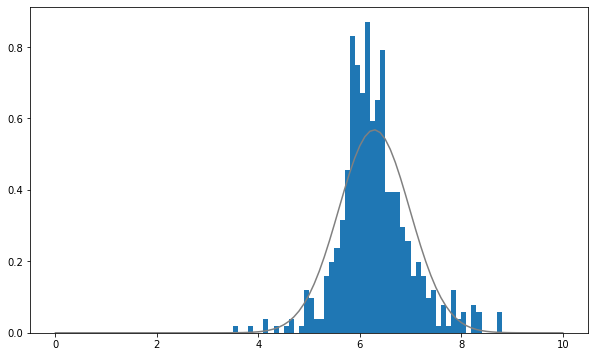

In [4]:
# 기초데이터 분포와 정규분포의 유사성 확인
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)/10
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(rooms, bins=100, range=(0, 10), density=True)

plt.show()

In [5]:
# 기초데이터에서 샘플 20개 뽑기
np.random.seed(0)
n = 20
sample = np.random.choice(rooms, n)
sample

array([5.572, 6.03 , 6.021, 7.178, 5.708, 6.438, 7.875, 6.112, 6.004,
       5.404, 6.826, 6.358, 6.63 , 6.121, 6.417, 6.437, 7.007, 6.405,
       6.567, 6.8  ])

In [6]:
# 20개를 10000번 뽑기
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(rooms, (n_samples, n))
# 모평균 및 모분산을 추정하기 위한 데이터로 활용할 예정

### 점추정

#### 모평균의 점추정
- 일치성 : 표본크기를 증가시키면 추측하려는 모수에 수렴해가는 성질
- 일치추정량 : 일치성을 지닌 추정량

In [7]:
# 20개 표본의 5개 표본평균
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean:.3f}')

1번째 표본평균: 6.167
2번째 표본평균: 6.224
3번째 표본평균: 6.510
4번째 표본평균: 6.328
5번째 표본평균: 6.491


In [8]:
# 20개 표본의 10000개 표본평균의 평균
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

6.284

In [9]:
# 1,000,000개 표본의 1개 표본평균
np.mean(np.random.choice(rooms, int(1e6)))

6.285

In [10]:
s_mean = np.mean(sample)
s_mean

6.396

불편성과 일치성을 지닌 추정량
- 불편성 : 추정량의 기대값이 추측하려는 모수가 되는 성질
- 일치성 : 표본크기를 증가시키면 추측하려는 모수에 수렴해가는 성질

즉, 표본평균은 불편성과 일치성 모두를 지닌 모수(모평균)의 '좋은 추정량'이다.

#### 모분산의 점추정

In [11]:
# 모분산의 점추정 표본분산 및 표본분산의 기대값

# 20개 표본의 5개 표본분산
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 0.874
2번째 표본분산: 0.521
3번째 표본분산: 0.322
4번째 표본분산: 0.221
5번째 표본분산: 0.419


In [12]:
# 20개 표본의 10,000개 표본분산들의 평균
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)
# 0.467로 실제 모분산값인 0.493과 크게 다름 즉, 표본분산은 불편추정량이 아님

0.467

In [13]:
# 불편분산 : 표본분산에서 n으로 나누던 것을 n-1로 변경한 것
# 자유도 n-1 적용된 불편분산 계산 방법 
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

0.491

In [15]:
# 1,000,000개 샘플의 불편분산 계산 시 모분산인 0.493과 거의 같아짐
np.var(np.random.choice(rooms, int(1e6)), ddof=1)

0.493

n-1은 자유도(degree of freedom)
- 불편분산 표현식에서의 n-1은 자유도를 뜻함
- 자유도 : 자유롭게 값을 취할 수 있는 변수의 개수
- 표본평균은 각 Xi에 아무 제약이 없기에 자유도가 n
- 분산의 경유 식에서 각 Xi가 표본평균을 만족해야하는 제약이 있다. (특정 Xi 하나는 표본평균(x바)와 동일하게 쓰이는 중복된 형태를 띄게됨)

In [16]:
u_var = np.var(sample, ddof=1)
u_var

0.333

표본평균과 불편분산은 각각 모평균과 모분산에 대해 불편성과 일치성을 만족하는 좋은 추정량이다!

### 구간추정

### 정규분포의 모평균(분산을 알고 있는)의 구간추정
- 추정량의 표준편차인 표준오차를 이용
- 모분산을 알고 있으므로 표준오차를 계산하는 방법으로 추정량의 오차를 계산할 수 있음

In [20]:
# 표본 데이터로 모평균의 95% 신뢰구간 계산
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl
# 모평균 6.285가 구간내에 포함되어있음을 확인
# 동일한 방법으로 수차례 표본추출하여 구간추정시 95%의 구간추정에는 모평균이 표함되어 있다

(6.088, 6.703)

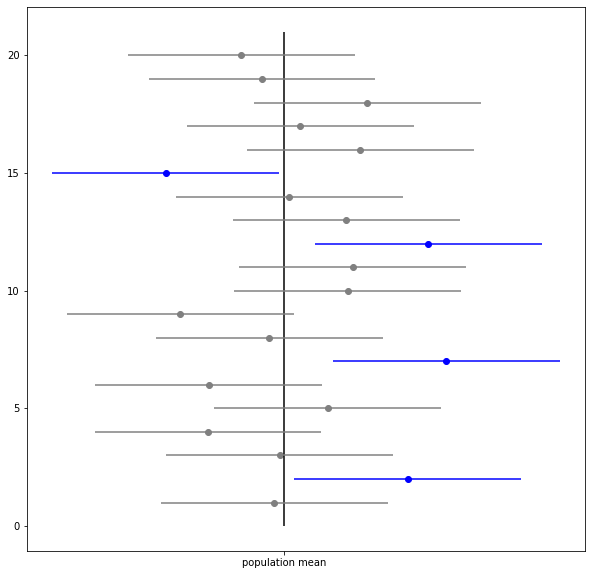

In [18]:
# 신뢰구간 해석을 위한 20회 추정을 통한 시각화 제시

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()
# 총 4번가 모평균을 포함하지 않은 구간추정임을 알 수 있다.
# 95% 신뢰구간으로 예측하였지만, 80%의 추정이 모평균을 포함하고 있음을 확인

In [21]:
# 신뢰구간 해석을 위한 10,000회 추정시 모평균을 포함할 확률 계산
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt / len(samples)
# 10,000개 신뢰구간의 약 94.7%가 모평균을 포함하고 있음을 확인 

0.947

### 정규분포의 모분산(평균을 알지 못하는)구간추정
- 정규분포의 불편분산 s^2과 관련된 확률분포는? 카이제곱 분포
- 카이제곱 분포로의 변환
- 불편분산 s^2에 Y = (n-1)s^2 / 시그마^2 이라는 변환을 하면 Y~X^2(n-1)이 됨


In [22]:
# 10,000개 표본 데이터 기반 Y의 표본 데이터 생성
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([35.474, 21.152, 13.053, ..., 17.608, 24.126,  9.3  ])

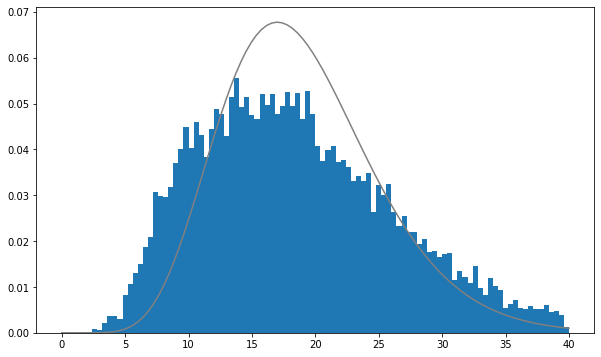

In [23]:
# Y의 표본데이터와 X^2(n-1) 시각화
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='gray')
hist, _, _ = ax.hist(sample_y, bins=100,
                     range=(0, 40), density=True)

plt.show()

In [24]:
# 표본데이터로 모분산의 95% 신뢰구간 계산
rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
hcl = (n-1) * u_var / rv.isf(0.975)

lcl, hcl
# 모분산 0.493이 구간내에 포함되어있음을 확인

(0.193, 0.711)

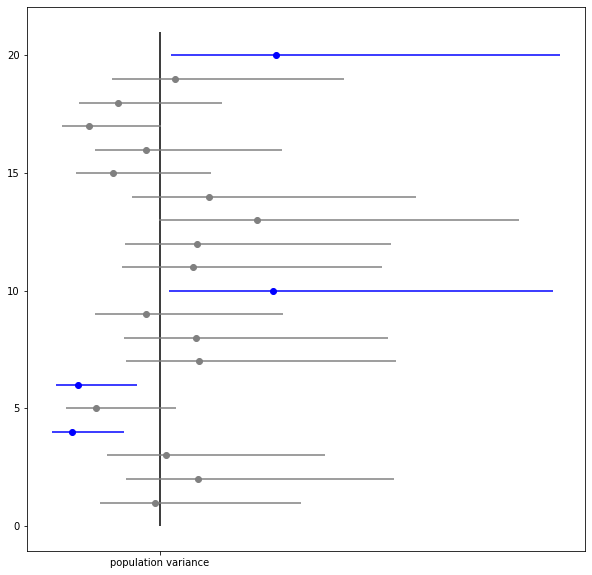

In [25]:
#  신뢰구간 해석을 위한 20회 추정을 통한 시각화 제시
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])

plt.show()
# 총 4회가 모분산을 포함하지 않은 구간추정임을 알 수 있다
# 95% 신뢰구간으로 예측하였지만, 80%의 추정이 모분산을 포함하고 있음을 확인

In [26]:
# 신뢰구간 해석을 위한 10,000회 추정시 모분산을 포함할 확률 계산
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1
        
cnt / len(samples)
# 10,000개의 신뢰구간의 약 84.5%가 모분산을 포함하고 있음을 확인(95%와 약간의 차이가 있음을 확인)

0.845

### 정규분포의 모평균(모분산을 알지 못하는) 구간추정
- 실제로는 모평균, 모분산 둘다 모르는 경우가 대부분
- 모분산 기반 표준오차가 아니더라도 모분산 대신 불편분산을 기반으로한 표준오차로 대신 사용

In [27]:
# 표본데이터로 모평균의 95% 신뢰구간 계산
rv = stats.t(df=n-1) # t분포 사용
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl
# 모평균 6.285가 구간내에 포함되어있음을 확인

(6.125, 6.666)